# Posttest 5

In [21]:
import pandas as pd
import seaborn as sns

In [19]:
df = pd.read_csv("exams.csv")
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [20]:
X = df[["math score", "reading score", "writing score"]]
Y = df["gender"]

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# K-Nearest Neighbor

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
modelKNN = KNeighborsClassifier(n_neighbors = 5)

In [26]:
modelKNN.fit(X_train, Y_train)

KNeighborsClassifier()

## Akurasi Training Set Menggunakan KNN

In [27]:
modelKNN.score(X_train, Y_train)

0.88

## Akurasi Testing Set Menggunakan KNN

In [33]:
modelKNN.score(X_test, Y_test)

0.875

In [44]:
nilai = [[67, 67, 63]]
modelKNN.predict(nilai)

C:\Users\1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['male'], dtype=object)

# Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
modelDT = DecisionTreeClassifier().fit(X_train, Y_train)

In [31]:
print(f'Akurasi Training Decision Tree : {modelDT.score(X_train, Y_train)}')
print(f'Akurasi Testing Decision Tree : {modelDT.score(X_test, Y_test)}')

Akurasi Training Decision Tree : 0.99125
Akurasi Testing Decision Tree : 0.815


In [45]:
nilai = [[55, 22, 63]]
modelDT.predict(nilai)

C:\Users\1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['female'], dtype=object)

In [47]:
from sklearn import tree
import matplotlib.pyplot as plt

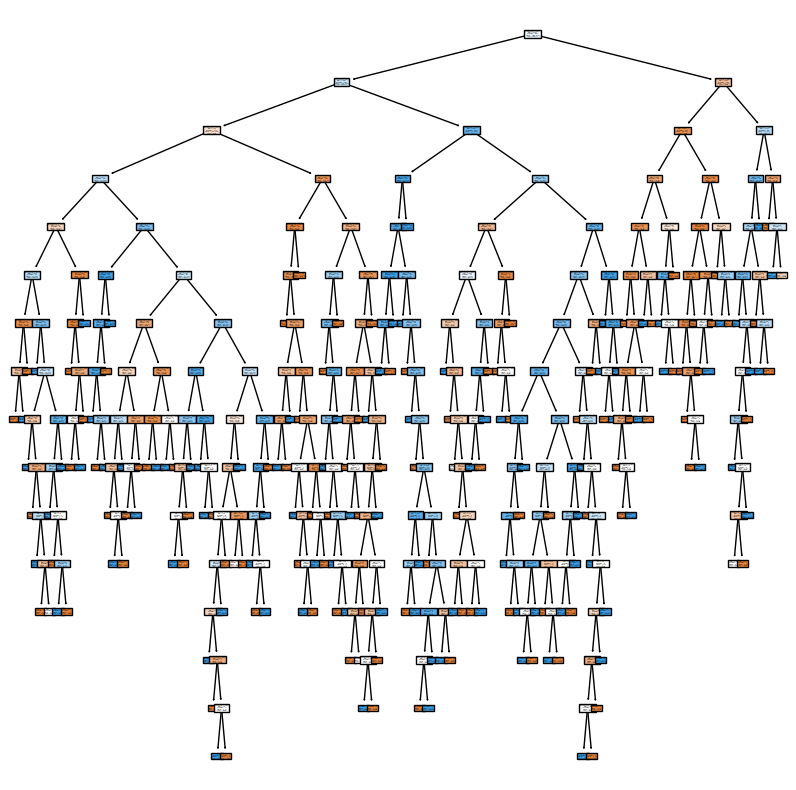

In [67]:
plt.figure(figsize=(10,10))
tree.plot_tree(modelDT, feature_names=X.columns, filled=True, class_names=Y.unique())
plt.show()
# Plot Tidak Dapat Dibaca Karena Decision Tree Terlalu Besar

# Tampilkan Score

## Naive Bayes

In [51]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [52]:
gnb = GaussianNB().fit(X_train, Y_train)

In [53]:
gnb_predict = gnb.predict(X_test)

In [54]:
accuracy_score(gnb_predict, Y_test)

0.72

## SVM (Support Vector Machine)

In [55]:
from sklearn.svm import SVC

In [56]:
svc = SVC().fit(X_train, Y_train)
svc_predict = svc.predict(X_test)

In [58]:
accuracy_score(Y_test, svc_predict)

0.86

# Visualisasi Regression

## Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression

In [61]:
x = df[["math score"]]
y = df[["writing score"]]

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [63]:
modelLR = LinearRegression().fit(x_train, y_train)

In [64]:
LR_predict = modelLR.predict(x_test)

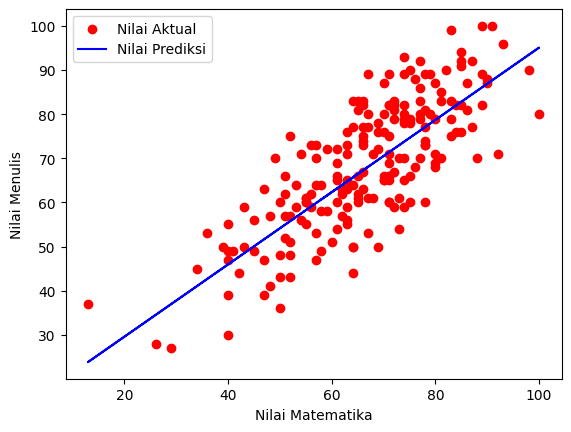

In [66]:
plt.scatter(x_test, y_test, color="red", label="Nilai Aktual")
plt.plot(x_test, LR_predict, color="blue", label="Nilai Prediksi")
plt.xlabel("Nilai Matematika")
plt.ylabel("Nilai Menulis")
plt.legend()
plt.show()